In [1]:
import os
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

from real_problem_1.utils.MyPlots import amp_time_graphic

plt.style.use("ggplot")


### **Amostragem**

In [ ]:
A   = 1
f   = 2
phi = 0

fs  = 100
T   = 1/fs

t   = np.arange(0, 1+T, T)

cos = np.cos(2*np.pi*f*t+phi)

real_cexp = np.real(cexp)
imag_cexp = np.imag(cexp)

fig = plt.figure(figsize = (20,6))
plt.scatter(t, cos, label="Amostras", c='k')
plt.plot(t, cos, label='"Dados reais"', c='r')
plt.xlabel("Tempo (s)", fontsize = 14)
plt.ylabel("Amplitude", fontsize = 14)
plt.legend(fontsize=16)    
plt.show()

### **Teorema e transformada de Fourier**

In [ ]:
Ti = 0
Tf = 1

N = 100000

f01 = 100
f02 = 200
f03 = 800

t = np.arange(Ti, Tf, 1/N)

x1 = np.cos(2*np.pi*f01*t)
x2 = np.cos(2*np.pi*f02*t)
x3 = np.cos(2*np.pi*f03*t)
x = x1+x2+x3

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,4))


axs[0].set_title("Sinal de Entrada")

axs[0].plot(t, x)
axs[0].set_xlim(0,0.01)


axs[1].plot(t,x1, label=f"{f01} Hz")
axs[1].plot(t,x2, label=f"{f02} Hz")
axs[1].plot(t,x3, label=f"{f03} Hz")
axs[1].set_title("Sinal Decomposto")

axs[1].set_xlim(0,0.01)
axs[1].legend(loc = "lower right")
plt.savefig("test.png", bbox_inches='tight', format='png', dpi=1000)
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,4))


axs[0].set_title("Sinal de Entrada")

axs[0].plot(t, x)
axs[0].set_xlim(0,0.01)


X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
X3 = np.fft.fft(x3)
freqs = np.fft.fftfreq(N,1/N)


axs[1].stem(freqs, np.abs(X1+X2+X3))
axs[1].set_xlim(-1000,1000)
axs[1].set_title("Transformada Discreta de Fourier")
plt.savefig("transformada.png", bbox_inches='tight', format='png', dpi=1000)
plt.show()

### **Spectral leakage**

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(16,6))


for idx, tempo_final in enumerate([0.018, 0.019, 0.02]):
    
    Ti = 0
    Tf = tempo_final
    N = 100000

    dt = (Tf-Ti)/N

    f01 = 100

    t = np.arange(Ti, Tf, dt)
    x1 = np.cos(2*np.pi*f01*t)
    x1 = np.sin(2*np.pi*f01*t)
    if idx==0:
        axs[idx,0].set_title(f"Sinal não periódico ({f01} Hz)")
    axs[idx,0].plot(t, x1, lw=5, c="k")
    t_aux = np.arange(Ti, 2*Tf, dt)
    axs[idx,0].scatter(t_aux, np.hstack([x1,x1]), s=8)

    X = np.fft.fft(np.hstack([x1,x1]))
    freqs = np.fft.fftfreq(2*N,dt)
    if idx==0:
        axs[idx, 1].set_title("Transformada de Fourier")
    axs[idx, 1].stem(freqs,np.abs(X))
    axs[idx, 1].set_xlim(-500,500)

plt.tight_layout()
plt.savefig(f"nao_periodico_{idx}.png", bbox_inches='tight', format='png', dpi=1000)

plt.show()

In [4]:
folder_path = os.path.join("data","raw")
file_path   = os.path.join("OSR_us_000_0010_8k.wav")

sr, x = wav.read(file_path)

Ts = 1/sr
Tf = len(x)/sr

t = np.arange(0, Tf, Ts)

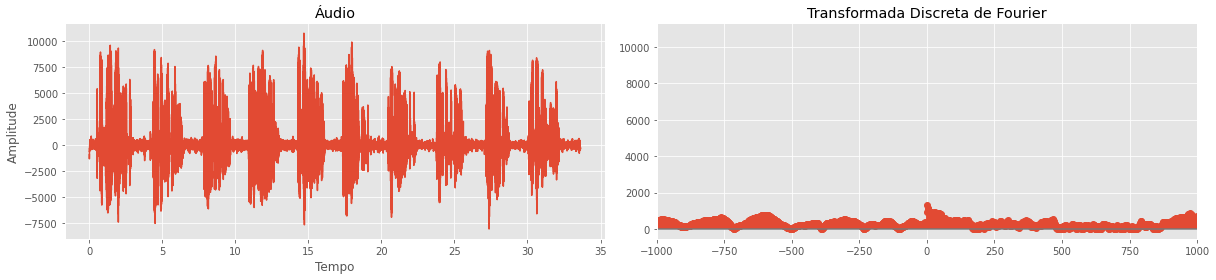

In [5]:
fig, axs = plt.subplots(1,2, figsize=(17,4))
texts = ["Tempo", "Amplitude"]

amp_time_graphic(t, x, 
                 axs[0], *(texts + [None,"Áudio"]))

freqs = np.fft.fftfreq(len(t),1/len(t))

axs[1].stem(freqs, np.abs(x))
axs[1].set_xlim(-1000,1000)
axs[1].set_title("Transformada Discreta de Fourier")
plt.tight_layout()
plt.savefig("audio_real_dft.png", bbox_inches='tight', format='png', dpi=1000)
plt.show()

In [29]:
sr = 8000

frame_size = 3
frame_stride = 5

frame_length, frame_step = int(frame_size*sr),int(frame_stride*sr) 

N = len(x)

qtd_frames = int(np.ceil((N - frame_length)/frame_step))

print(f"Quantidade de samples do sinal: {N}")
print(f"Tamanho do frame: {frame_length}")
print(f"Tamanho do passo: {frame_step}")

Quantidade de samples do sinal: 268985
Tamanho do frame: 24000
Tamanho do passo: 40000


In [24]:
(N // qtd_frames)

38426

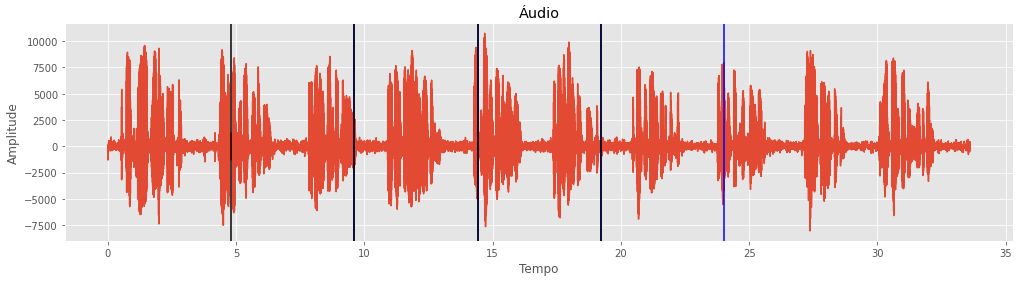

In [28]:
fig, axs = plt.subplots(1, figsize=(17,4))

amp_time_graphic(t, x, axs, *(texts + [None,"Áudio"]))

for i in range(1, 5):
    plt.axvline(x = t[i*(N // qtd_frames)], color = 'k', label = 'axvline - full height')
    plt.axvline(x = t[(i+1)*(N // qtd_frames)], color = 'b', label = 'axvline - full height')    

In [19]:
Ts = 1/sr
Tf = len(x)/sr

t = np.arange(0, Tf, Ts)

268985